# Testing for UNION - graphical info
fistly define the UUID of the experiment to use

In [1]:
experimentId="f9bdb803-d62d-4eb1-a3a6-cd124daf73d0"

-------------------------------------------------------

In [2]:
#external libraries
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.colors as clt
import plotly
import plotly.subplots as sb
import plotly.express as px
import plotly.graph_objects as go
import dotenv
import pandas as pd
import scipy.fft as fft
import scipy.signal as sg
import scipy.io as sio
import pickle as pkl
import xgboost as xgb
import time
import sklearn.metrics as skm

#project library
from spinco import *

#environment variables
dotenv.load_dotenv('lab.env')

#project variables
datapath=os.environ['DATAPATH']
cognipath=datapath+"\\COGNITION"
dreamspath=datapath+"\\DREAMS"
masspath=datapath+"\\MASS"


## load mass

In [3]:
samplerate=200  #Should rethink this

In [4]:
annotations, signalsMetadata = loadMASSSpindles(masspath,forceSamplerate=samplerate)

In [5]:
#consider to include this in a function
minDuration=0.3
maxDuration=2.9
annotations=annotations[annotations.type=='spindle']
annotations=annotations[annotations.duration>minDuration]
annotations=annotations[annotations.duration<maxDuration]
annotations=annotations.reset_index(drop=True)

In [6]:
#check with EDA results (not needed)
print(1-len(annotations)/33458)

0.011297746428357902


In [7]:
annotations.head()

,type,expert,subjectId,labelerId,startTime,duration,samplerate,stopTime,startInd,stopInd
0,spindle,E1,0001,0001,888.327805,0.640579,200,888.968384,177666,177794
1,spindle,E1,0001,0001,905.758061,0.578094,200,906.336155,181152,181267
2,spindle,E1,0001,0001,917.731574,0.847603,200,918.579177,183546,183716
3,spindle,E1,0001,0001,922.078189,0.878845,200,922.957034,184416,184591
4,spindle,E1,0001,0001,939.055445,0.757767,200,939.813212,187811,187963


In [8]:
signalsMetadata.head()

,subjectId,file,channel,duration,samplerate,isOriginalSamplerate,database
0,0001,MASS_0001.pkl,C3-CLE,28956.0,200,False,MASS
1,0002,MASS_0002.pkl,C3-CLE,35016.0,200,False,MASS
2,0003,MASS_0003.pkl,C3-CLE,36760.0,200,False,MASS
3,0004,MASS_0004.pkl,C3-CLE,28004.0,200,False,MASS
4,0005,MASS_0005.pkl,C3-CLE,31244.0,200,False,MASS


## Load experiment results

In [9]:
experimentModels, featureSelection = loadExperiment(experimentId,datapath)

In [10]:
experimentModels

,criteriumId,criteriumName,labelerIdList,train,val,test,modelId,spindleTimeRate
0,0001,E1,[0001],"[0003, 0005, 0007, 0009, 0010, 0011, 0012, 001...","[0017, 0002, 0006]",0001,8b2ea581-6dec-4094-957e-cc1ceb7234c5,0.018639
1,0001,E1,[0001],"[0001, 0003, 0005, 0007, 0009, 0010, 0011, 001...","[0006, 0013, 0019]",0002,80181036-469f-4bcf-95a0-68374649133a,0.020055
2,0001,E1,[0001],"[0002, 0005, 0007, 0009, 0010, 0011, 0012, 001...","[0013, 0006, 0001]",0003,f6cafb09-5e74-4889-a306-e517e28d70fe,0.021075
3,0001,E1,[0001],"[0001, 0002, 0003, 0006, 0007, 0009, 0010, 001...","[0018, 0014, 0012]",0005,2bf1e17a-c8bb-4166-8453-7fdff2414b10,0.018331
4,0001,E1,[0001],"[0003, 0007, 0009, 0010, 0011, 0012, 0013, 001...","[0005, 0001, 0002]",0006,0feacbcf-4f37-402e-8fbc-4e48a2520bd4,0.019222
5,0001,E1,[0001],"[0001, 0002, 0003, 0010, 0011, 0012, 0013, 001...","[0005, 0006, 0009]",0007,29c70696-0202-4feb-bd78-3579052a4865,0.019625
6,0001,E1,[0001],"[0001, 0003, 0005, 0006, 0007, 0010, 0011, 001...","[0002, 0017, 0013]",0009,768cb7b4-e534-49f7-b9c4-acfa7b401ffe,0.017824
7,0001,E1,[0001],"[0002, 0003, 0005, 0006, 0007, 0009, 0012, 001...","[0017, 0001, 0011]",0010,e3d50ec6-a2f8-45fc-88f9-9af0621c2050,0.017542
8,0001,E1,[0001],"[0001, 0003, 0005, 0006, 0009, 0010, 0012, 001...","[0002, 0018, 0007]",0011,d539204f-ac49-4811-9ed0-9b39bc65c8f3,0.015442
9,0001,E1,[0001],"[0002, 0003, 0005, 0006, 0009, 0011, 0013, 001...","[0001, 0007, 0010]",0012,1fe9ebda-f8d4-46a7-8ec3-1c1477a12af6,0.016460


In [11]:
#we show the difference in class inbalance for the annotation criteria considered
experimentModels[['criteriumName','spindleTimeRate']].groupby('criteriumName').describe()

spindleTimeRate                                          \
                        count      mean       std       min       25%   
criteriumName                                                           
E1                       15.0  0.018463  0.001834  0.015442  0.017419   
E2                       15.0  0.056955  0.004466  0.050874  0.053849   
union                    15.0  0.058488  0.004535  0.052594  0.055095   

                                             
                    50%       75%       max  
criteriumName                                
E1             0.018331  0.019424  0.022439  
E2             0.055090  0.060190  0.065389  
union          0.056933  0.061656  0.067267

In [12]:
featureSelection

,window,characteristic,bandName,score
0,2,hjortActivity,beta2,69.0
1,1,hjortActivity,sigma,63.0
2,2,hjortActivity,beta1,42.0
3,2,hjortActivity,delta2,41.0
4,1.5,sigmaIndex,broadband,39.0
5,2,sigmaIndex,broadband,39.0
6,2,hjortActivity,theta,38.0
7,2,hjortMobility,beta1,37.0
8,2,hjortActivity,alpha,35.0
9,1,sigmaIndex,broadband,34.0


## Hyperparameter definition
this should come from a previous evaluation notebook

In [13]:
hyperClose=0.25
hyperDuration=0.3
hyperThres=0.3
hyperDepth=40

## Testing with E2 criterium
we test the optimal points for the prediction threshold and number of boost iterations in the different validation groups

In [14]:
experimentModels=experimentModels[experimentModels.criteriumName=='union'].reset_index(drop=True)
experimentModels

,criteriumId,criteriumName,labelerIdList,train,val,test,modelId,spindleTimeRate
0,0003,union,"[0001, 0002]","[0003, 0005, 0007, 0009, 0010, 0011, 0012, 001...","[0017, 0002, 0006]",0001,7feab6c6-8ccf-4056-b394-5b6d7b96cb7a,0.056933
1,0003,union,"[0001, 0002]","[0001, 0003, 0005, 0007, 0009, 0010, 0011, 001...","[0006, 0013, 0019]",0002,aca6fbc5-bdf4-4890-bc15-bd3cc527aa65,0.061753
2,0003,union,"[0001, 0002]","[0002, 0005, 0007, 0009, 0010, 0011, 0012, 001...","[0013, 0006, 0001]",0003,ec017e6c-bd1b-41f7-af84-ed6023617980,0.063653
3,0003,union,"[0001, 0002]","[0001, 0002, 0003, 0006, 0007, 0009, 0010, 001...","[0018, 0014, 0012]",0005,abcd606e-c9ec-4194-807e-4a045dcd0e18,0.061551
4,0003,union,"[0001, 0002]","[0003, 0007, 0009, 0010, 0011, 0012, 0013, 001...","[0005, 0001, 0002]",0006,ba039537-8f79-49cf-8ac8-383434059506,0.058867
5,0003,union,"[0001, 0002]","[0001, 0002, 0003, 0010, 0011, 0012, 0013, 001...","[0005, 0006, 0009]",0007,496b4ddf-f8cb-4244-89ad-0439681b820b,0.061559
6,0003,union,"[0001, 0002]","[0001, 0003, 0005, 0006, 0007, 0010, 0011, 001...","[0002, 0017, 0013]",0009,7daf0b7c-d584-4841-8dd3-6d4cec075655,0.056429
7,0003,union,"[0001, 0002]","[0002, 0003, 0005, 0006, 0007, 0009, 0012, 001...","[0017, 0001, 0011]",0010,cf984650-f856-4b2e-9290-4aba38fd6427,0.052594
8,0003,union,"[0001, 0002]","[0001, 0003, 0005, 0006, 0009, 0010, 0012, 001...","[0002, 0018, 0007]",0011,8be0a742-8fa8-4f1f-a081-622ff61d7bb5,0.054510
9,0003,union,"[0001, 0002]","[0002, 0003, 0005, 0006, 0009, 0011, 0013, 001...","[0001, 0007, 0010]",0012,87814133-dd28-4c87-860b-c4ef8d85801e,0.053111


In [20]:
row=experimentModels.iloc[9]

In [21]:
row

criteriumId                                                     0003
criteriumName                                                  union
labelerIdList                                           [0001, 0002]
train              [0002, 0003, 0005, 0006, 0009, 0011, 0013, 001...
val                                               [0001, 0007, 0010]
test                                                            0012
modelId                         87814133-dd28-4c87-860b-c4ef8d85801e
spindleTimeRate                                             0.053111
Name: 9, dtype: object

In [17]:
#threshold for the metric by event
masterIoU=0.2

In [18]:
def getIou(coordA,coordB):
    if (coordA[1]<coordB[0])|(coordB[1]<coordA[0]): #NOT INTERSECTION
        iou=0
    else:   #INTERSECTION
        inter=np.min((coordA[1]-coordB[0],coordB[1]-coordA[0]))
        union=np.max((coordA[1]-coordB[0],coordB[1]-coordA[0]))
        iou=inter/union
    return iou

def annotationPairToMetrics(annotations,detections,thresIoU=0.2):
    #get the coords
    gtCoords=zip(annotations.startInd,annotations.stopInd)
    outCoords=zip(detections.startInd,detections.stopInd)
    #calculate the iou vector
    iouVector=np.array(list(itt.starmap(getIou,itt.product(gtCoords,outCoords))))
    #reshape to a matrix
    iouMatrix=iouVector.reshape(len(annotations),len(detections))
    #binarize
    binarized=iouMatrix>thresIoU
    #calculateF1
    outF1=(np.sum(np.max(binarized,axis=0))+np.sum(np.max(binarized,axis=1)))/(len(annotations)+len(detections))
    recall=np.sum(np.max(binarized,axis=1))/len(annotations)
    precision=np.sum(np.max(binarized,axis=0))/len(detections)
    return outF1,recall,precision

In [23]:
model=loadBooster(row.modelId,experimentId,datapath)

testSubjectId=row.test
#Define annotations criterium
usedAnnotations=annotations[annotations.labelerId.isin(row.labelerIdList)].reset_index(drop=True)
#Load features and labels
testFeatures=loadFeatureMatrix([testSubjectId],featureSelection,signalsMetadata,samplerate,datapath)
testLabels=loadLabelsVector([testSubjectId],usedAnnotations,signalsMetadata,samplerate)

#Predict
testDMatrix=xgb.DMatrix(data=testFeatures)
probabilities=model.predict(testDMatrix,iteration_range=(0,hyperDepth))
rawLabels=probabilities>=hyperThres

#Process
processedLabels=labelingProcess(rawLabels,hyperClose,hyperDuration,samplerate)

#By-event metrics
processedAnnotations=labelVectorToAnnotations(processedLabels,samplerate)
gtAnnotations=labelVectorToAnnotations(testLabels,samplerate)   #<- or just filter the annotations


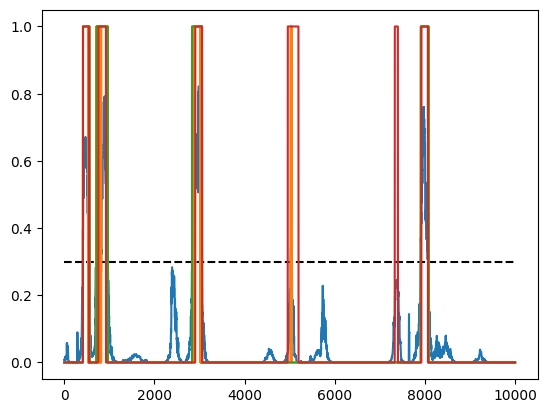

In [39]:
roi=[160000,170000]
plt.plot(probabilities[roi[0]:roi[1]])
plt.hlines(hyperThres,xmin=0,xmax=roi[1]-roi[0],linestyles="dashed",colors="black")
plt.plot(rawLabels[roi[0]:roi[1]])
plt.plot(processedLabels[roi[0]:roi[1]])
plt.plot(testLabels[roi[0]:roi[1]])


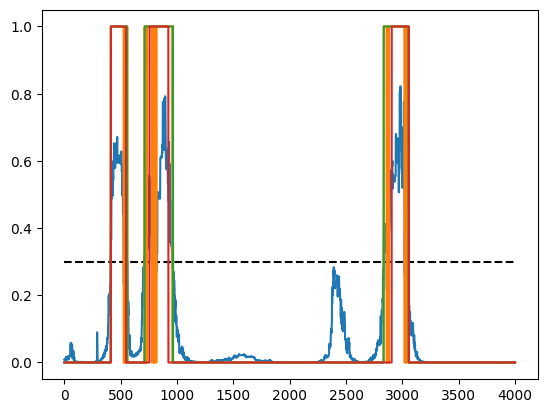

In [51]:
roi=[160000,164000]
plt.plot(probabilities[roi[0]:roi[1]])
plt.hlines(hyperThres,xmin=0,xmax=roi[1]-roi[0],linestyles="dashed",colors="black")
plt.plot(rawLabels[roi[0]:roi[1]])
plt.plot(processedLabels[roi[0]:roi[1]])
plt.plot(testLabels[roi[0]:roi[1]])


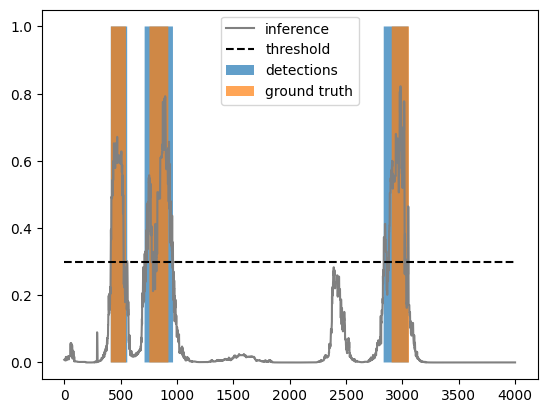

In [62]:
roi=[160000,164000]
plt.plot(probabilities[roi[0]:roi[1]],color="grey")
plt.hlines(hyperThres,xmin=0,xmax=roi[1]-roi[0],linestyles="dashed",colors="black")
plt.fill(processedLabels[roi[0]:roi[1]],alpha=0.7)
plt.fill(testLabels[roi[0]:roi[1]],alpha=0.7)
plt.legend(["inference","threshold","detections","ground truth"])

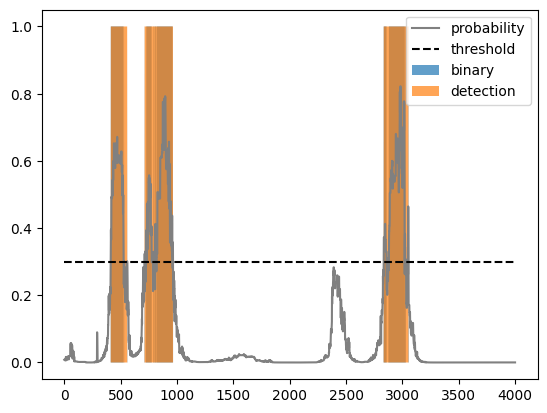

In [86]:
roi=[160000,164000]
plt.plot(probabilities[roi[0]:roi[1]],color="grey")
plt.hlines(hyperThres,xmin=0,xmax=roi[1]-roi[0],linestyles="dashed",colors="black")
plt.fill(rawLabels[roi[0]:roi[1]],alpha=0.7)
plt.fill(processedLabels[roi[0]:roi[1]],alpha=0.7)
#plt.fill(testLabels[roi[0]:roi[1]],alpha=0.7)
plt.legend(["probability","threshold","binary","detection"])

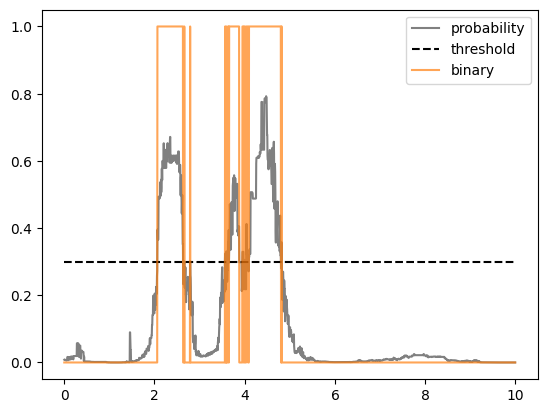

In [105]:
roi=[160000,162000]
timepoints=np.arange(roi[1]-roi[0])/200
plt.plot(timepoints,probabilities[roi[0]:roi[1]],color="grey")
plt.hlines(hyperThres,xmin=0,xmax=timepoints[-1],linestyles="dashed",colors="black")
plt.plot(timepoints,rawLabels[roi[0]:roi[1]],alpha=0.7,color="#ff7f0e")
#plt.fill(processedLabels[roi[0]:roi[1]],alpha=0.7)
#plt.fill(testLabels[roi[0]:roi[1]],alpha=0.7)
plt.legend(["probability","threshold","binary","detection"])

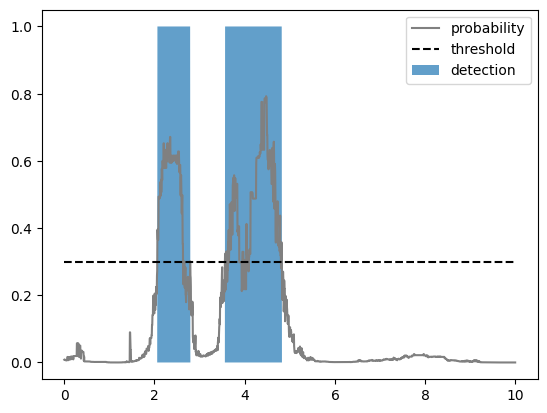

In [107]:
roi=[160000,162000]
timepoints=np.arange(roi[1]-roi[0])/200
plt.plot(timepoints,probabilities[roi[0]:roi[1]],color="grey")
plt.hlines(hyperThres,xmin=0,xmax=timepoints[-1],linestyles="dashed",colors="black")
#plt.fill(rawLabels[roi[0]:roi[1]],alpha=0.7)
plt.fill(timepoints,processedLabels[roi[0]:roi[1]],alpha=0.7)
#plt.fill(testLabels[roi[0]:roi[1]],alpha=0.7)
plt.legend(["probability","threshold","detection"])

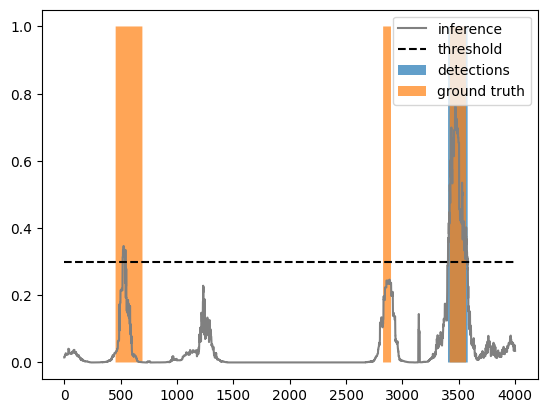

In [69]:
roi=[164500,168500]
plt.plot(probabilities[roi[0]:roi[1]],color="grey")
plt.hlines(hyperThres,xmin=0,xmax=roi[1]-roi[0],linestyles="dashed",colors="black")
plt.fill(processedLabels[roi[0]:roi[1]],alpha=0.7)
plt.fill(testLabels[roi[0]:roi[1]],alpha=0.7)
plt.legend(["inference","threshold","detections","ground truth"])